<a href="https://colab.research.google.com/github/skarthi369/AI-AURA--HACKFINITY/blob/main/Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center; color: #2E8B57; font-family: 'Arial', sans-serif; margin-top: 50px;">
  <span style="font-size: 48px; font-weight: bold;">🌱 AI-Powered Plant Disease Detection</span><br>
  <span style="font-size: 36px;">& Fertilizer Recommendation System</span>
</h1>

---

**Dataset:** https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Import Libraries

In this section, we are importing all the necessary libraries and modules like PyTorch, torchvision, PIL, etc., which we will use to handle datasets, build models, and perform data processing.

In [ ]:
import os
import gc
import torch
from PIL import Image
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import figure
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Dataset Overview

Let's explore the dataset by listing the folder contents and checking the number of images in each class. This will help us understand the structure of our dataset.

In [ ]:
folder_path = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

file_list = os.listdir(folder_path)
file_list

['Tomato___Late_blight',
 'Tomato___healthy',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Potato___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___Early_blight',
 'Tomato___Septoria_leaf_spot',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Strawberry___Leaf_scorch',
 'Peach___healthy',
 'Apple___Apple_scab',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Bacterial_spot',
 'Apple___Black_rot',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Peach___Bacterial_spot',
 'Apple___Cedar_apple_rust',
 'Tomato___Target_Spot',
 'Pepper,_bell___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Strawberry___healthy',
 'Apple___healthy',
 'Grape___Black_rot',
 'Potato___Early_blight',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Common_rust_',
 'Grape___Esca_(Black_Measles)',
 'Raspberry___healthy'

In [ ]:
for cls in file_list:
  print(cls, ':', len(os.listdir(folder_path  + '/' + cls)))

Tomato___Late_blight : 1851
Tomato___healthy : 1926
Grape___healthy : 1692
Orange___Haunglongbing_(Citrus_greening) : 2010
Soybean___healthy : 2022
Squash___Powdery_mildew : 1736
Potato___healthy : 1824
Corn_(maize)___Northern_Leaf_Blight : 1908
Tomato___Early_blight : 1920
Tomato___Septoria_leaf_spot : 1745
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot : 1642
Strawberry___Leaf_scorch : 1774
Peach___healthy : 1728
Apple___Apple_scab : 2016
Tomato___Tomato_Yellow_Leaf_Curl_Virus : 1961
Tomato___Bacterial_spot : 1702
Apple___Black_rot : 1987
Blueberry___healthy : 1816
Cherry_(including_sour)___Powdery_mildew : 1683
Peach___Bacterial_spot : 1838
Apple___Cedar_apple_rust : 1760
Tomato___Target_Spot : 1827
Pepper,_bell___healthy : 1988
Grape___Leaf_blight_(Isariopsis_Leaf_Spot) : 1722
Potato___Late_blight : 1939
Tomato___Tomato_mosaic_virus : 1790
Strawberry___healthy : 1824
Apple___healthy : 2008
Grape___Black_rot : 1888
Potato___Early_blight : 1939
Cherry_(including_sour)___healthy :

## Transforming and Preparing the Dataset

Here, we are applying transformations like resizing and cropping to the images. These transformations will ensure uniformity and improve training efficiency.

In [ ]:
dataset = ImageFolder(folder_path, transform = tt.Compose([tt.Resize(255), tt.RandomCrop(224), tt.ToTensor()]))

In [ ]:
dataset

Dataset ImageFolder
    Number of datapoints: 70295
    Root location: /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=bilinear, max_size=None, antialias=True)
               RandomCrop(size=(224, 224), padding=None)
               ToTensor()
           )

## Visualizing Sample Images

In this section, we visualize a few sample images to understand the dataset better and ensure the transformations are correctly applied.

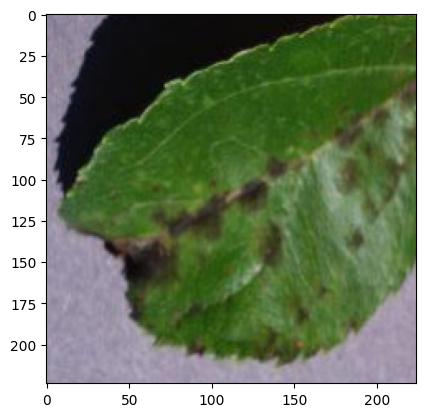

In [ ]:
image, label = dataset[14]
plt.imshow(image.permute(1,2,0))

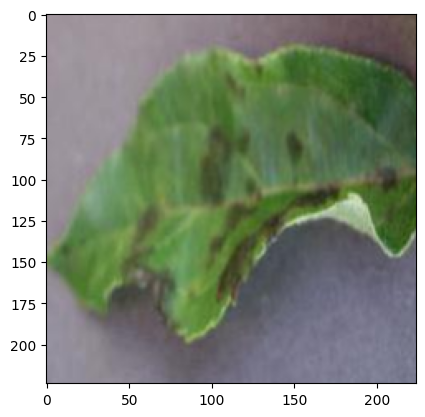

In [ ]:
image, label = dataset[1555]
plt.imshow(image.permute(1,2,0))

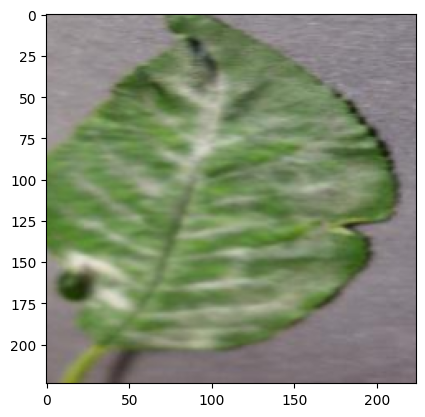

In [ ]:
image, label = dataset[11114]
plt.imshow(image.permute(1,2,0))

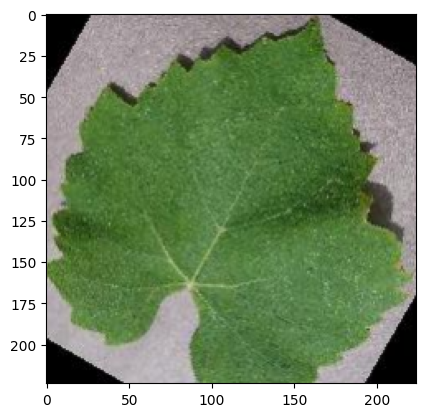

In [ ]:
image, label = dataset[25984]
plt.imshow(image.permute(1,2,0))

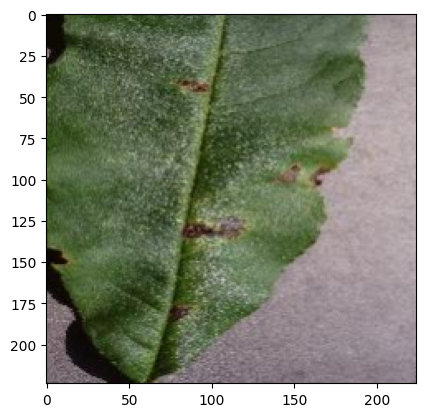

In [ ]:
image, label = dataset[30024]
plt.imshow(image.permute(1,2,0))

## Splitting the Dataset

We split the dataset into training and validation sets, ensuring that we can evaluate our model's performance during training.

In [ ]:
size_per = 0.2
valid_size = int(len(dataset) * size_per)
train_size = len(dataset) - valid_size

train_ds, valid_ds = random_split(dataset, [train_size, valid_size])
print("Length of Train dataset :",len(train_ds))
print("Length of Valid dataset :",len(valid_ds))

Length of Train dataset : 56236
Length of Valid dataset : 14059


### Creating DataLoaders

DataLoaders are created to load the data in batches for efficient training and validation.

In [ ]:
batch_size = 64
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size, num_workers=4, pin_memory=True)

### Visualizing Batch of Images

Let's display a batch of images from the training DataLoader to ensure the batches are being created correctly.

In [ ]:
def show_batch(dl):
  for image, _ in dl:
    px, ax = plt.subplots(figsize=(16,12))
    ax.set_xticks([]), ax.set_yticks([])
    ax.imshow(make_grid(image, nrow=16).permute(1,2,0))
    torch.cuda.empty_cache
    break


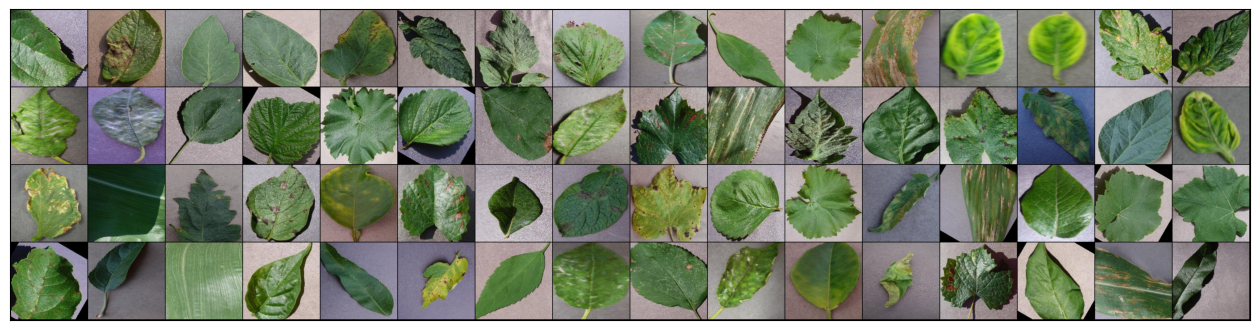

In [ ]:
show_batch(train_dl)

We define utility functions to move data and DataLoaders to the GPU if available, speeding up the computations.

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)


In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

## Building the **CNN** Model

Here, we define our CNN model structure, including convolutional layers, pooling, and fully connected layers, for plant disease detection.

In [ ]:
class PlantDiseaseDetection(nn.Module):
    """ calculate the loss of batch of training dataloader"""
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        torch.cuda.empty_cache
        return loss
    """calculate the loss and accuracy of batch of validation dataloader"""
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)
        torch.cuda.empty_cache          # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))


In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

@torch.no_grad()
def evaluate(model, val_loader):
    """ Define the model's performance on validation set..."""
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):

        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            torch.cuda.empty_cache
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            torch.cuda.empty_cache

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
        torch.cuda.empty_cache
    return history

In [ ]:
class CNN(PlantDiseaseDetection):
    def __init__(self, K):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            # conv1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
            # conv2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            # conv3
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            # conv4
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2),
        )

        self.dense_layers = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(50176, 1024),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(1024, K),
        )

    def forward(self, X):
        out = self.conv_layers(X)

        # Flatten
        out = out.view(-1, 50176)

        # Fully connected
        out = self.dense_layers(out)

        return out

In [ ]:
model = to_device(CNN(len(dataset.classes)), device)
model

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

In [ ]:
torch.cuda.empty_cache
for batch in train_dl:
  images, labels = batch
  print("images_shape:", images.shape)
  print("image_device:", images.device)
  pred = model(images)
  print('pred_shape:', pred.shape)
  torch.cuda.empty_cache
  break

images_shape: torch.Size([64, 3, 224, 224])
image_device: cuda:0
pred_shape: torch.Size([64, 38])


In [ ]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 3.63763689994812, 'val_acc': 0.02581593580543995}]

### Training the Model

In this section, we train the CNN model for several epochs and record the training and validation losses and accuracies.

In [ ]:
%%time
history += fit(5, 0.001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 2.3086, val_loss: 1.2783, val_acc: 0.6242
Epoch [1], train_loss: 1.3633, val_loss: 1.0972, val_acc: 0.6881
Epoch [2], train_loss: 1.0146, val_loss: 0.9351, val_acc: 0.7327
Epoch [3], train_loss: 0.7527, val_loss: 1.2637, val_acc: 0.6848
Epoch [4], train_loss: 0.5833, val_loss: 0.4054, val_acc: 0.8804
CPU times: user 9min, sys: 8min 19s, total: 17min 20s
Wall time: 16min 8s


In [ ]:
%%time
history += fit(5, 0.0001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 0.3139, val_loss: 0.1397, val_acc: 0.9562
Epoch [1], train_loss: 0.2510, val_loss: 0.1241, val_acc: 0.9634
Epoch [2], train_loss: 0.2168, val_loss: 0.1165, val_acc: 0.9636
Epoch [3], train_loss: 0.1991, val_loss: 0.1038, val_acc: 0.9666
Epoch [4], train_loss: 0.1757, val_loss: 0.1084, val_acc: 0.9664
CPU times: user 9min 3s, sys: 8min 23s, total: 17min 26s
Wall time: 16min 5s


In [ ]:
%%time
history += fit(5, 0.00001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 0.1506, val_loss: 0.0901, val_acc: 0.9713
Epoch [1], train_loss: 0.1495, val_loss: 0.0871, val_acc: 0.9725
Epoch [2], train_loss: 0.1409, val_loss: 0.0890, val_acc: 0.9728
Epoch [3], train_loss: 0.1400, val_loss: 0.0858, val_acc: 0.9733
Epoch [4], train_loss: 0.1358, val_loss: 0.0865, val_acc: 0.9739
CPU times: user 9min 3s, sys: 8min 23s, total: 17min 27s
Wall time: 16min 7s


In [ ]:
%%time
history += fit(5, 0.000001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 0.1358, val_loss: 0.0848, val_acc: 0.9735
Epoch [1], train_loss: 0.1344, val_loss: 0.0874, val_acc: 0.9738
Epoch [2], train_loss: 0.1342, val_loss: 0.0824, val_acc: 0.9734
Epoch [3], train_loss: 0.1340, val_loss: 0.0839, val_acc: 0.9742
Epoch [4], train_loss: 0.1365, val_loss: 0.0869, val_acc: 0.9741
CPU times: user 9min 2s, sys: 8min 23s, total: 17min 26s
Wall time: 16min 6s


In [ ]:
%%time
history += fit(10, 0.0000001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 0.1328, val_loss: 0.0861, val_acc: 0.9745
Epoch [1], train_loss: 0.1387, val_loss: 0.0830, val_acc: 0.9741
Epoch [2], train_loss: 0.1353, val_loss: 0.0814, val_acc: 0.9749
Epoch [3], train_loss: 0.1308, val_loss: 0.0810, val_acc: 0.9745
Epoch [4], train_loss: 0.1322, val_loss: 0.0831, val_acc: 0.9756
Epoch [5], train_loss: 0.1315, val_loss: 0.0821, val_acc: 0.9744
Epoch [6], train_loss: 0.1332, val_loss: 0.0890, val_acc: 0.9740
Epoch [7], train_loss: 0.1329, val_loss: 0.0856, val_acc: 0.9743
Epoch [8], train_loss: 0.1334, val_loss: 0.0841, val_acc: 0.9745
Epoch [9], train_loss: 0.1348, val_loss: 0.0852, val_acc: 0.9738
CPU times: user 18min 8s, sys: 16min 41s, total: 34min 50s
Wall time: 32min 15s


**CNN Accuracy: 97.59%**

### Saving the Model

Save the trained model to the Kaggle working directory for future use or deployment.

In [ ]:
model_path = '/kaggle/working/Plant_Disease_Detection_Model.pth'
torch.save(model.state_dict(), model_path)

In [ ]:
# Display confirmation

print(f"Model saved to: {model_path}")

Model saved to: /kaggle/working/Plant_Disease_Detection_Model.pth


In [ ]:
targets_size = 38
model = CNN(targets_size)

model.load_state_dict(torch.load('/kaggle/working/Plant_Disease_Detection_Model.pth', map_location=torch.device('cuda')))
model.eval()

print("Model successfully loaded and ready for evaluation.")

Model successfully loaded and ready for evaluation.


### Plotting Accuracy and Loss

Finally, we visualize the training and validation accuracy and loss over the epochs to understand the model's performance trends.

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

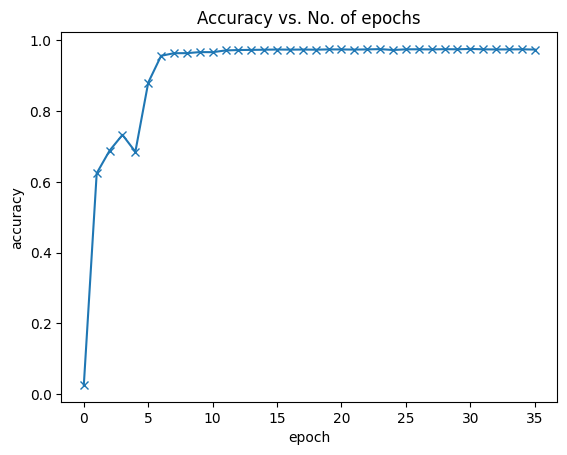

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

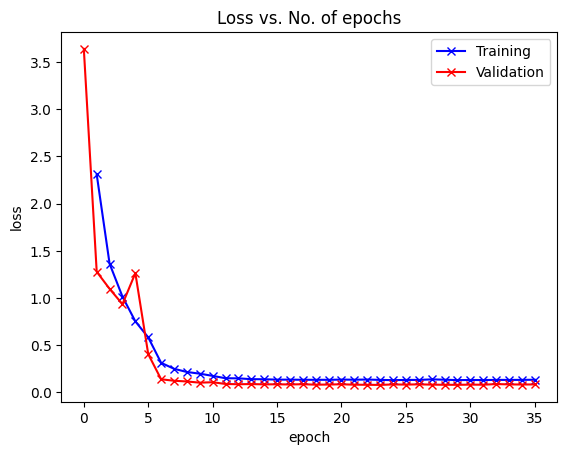

In [ ]:
plot_losses(history)

## Predicting Plant Diseases Using the Model

This section demonstrates how to use the trained CNN model to predict plant diseases for individual images and obtain detailed information about the crop and disease.

In [ ]:
model = to_device(model, device)

### Predict Disease from a Single Image

We define a helper function, predict_image, to process and predict the disease category of an image using the trained model. The predicted result is matched with the corresponding class name.

In [ ]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return dataset.classes[preds[0].item()]

In [ ]:
def show_image_prediction(img, label):
  plt.imshow(img.permute(1, 2, 0))
  print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Potato___Early_blight , Predicted: Potato___Early_blight


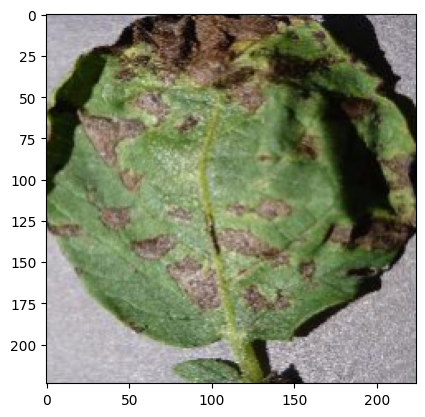

In [ ]:
show_image_prediction(*valid_ds[257])

Label: Tomato___Spider_mites Two-spotted_spider_mite , Predicted: Tomato___Spider_mites Two-spotted_spider_mite


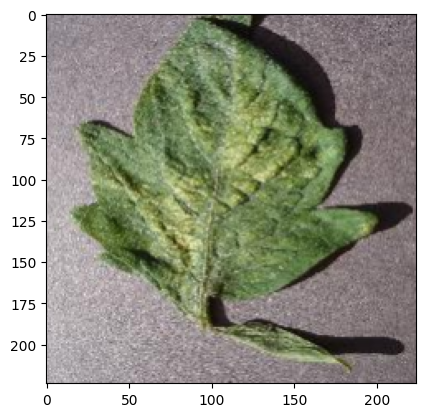

In [ ]:
show_image_prediction(*valid_ds[343])

Label: Corn_(maize)___Common_rust_ , Predicted: Corn_(maize)___Common_rust_


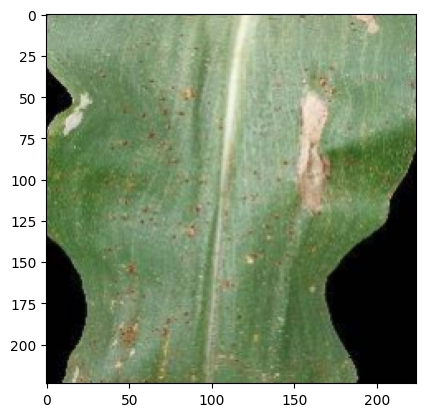

In [ ]:
show_image_prediction(*valid_ds[1023])

---

### Detailed Prediction with Supplementary Information

To provide more context about the predictions, we use an external dataset that maps class indices to crop names and diseases. The single_prediction function predicts the disease for a given image and extracts additional details.

In [ ]:
supplement_info = pd.read_csv("/kaggle/input/supplement-information/supplement_info.csv")

In [ ]:
supplement_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             39 non-null     int64 
 1   disease_name      39 non-null     object
 2   supplement name   38 non-null     object
 3   supplement image  38 non-null     object
 4   buy link          38 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [ ]:
# Function for prediction

def single_prediction(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))
    input_data = TF.to_tensor(image)
    input_data = input_data.unsqueeze(0).to(device)

    output = model(input_data)
    output = output.detach().cpu().numpy()
    index = np.argmax(output)

    predicted_class_name = supplement_info["disease_name"][index]
    crop, disease = predicted_class_name.split('___')

    print(f"Original :  {predicted_class_name}")
    print(f"{crop} : {disease}")

In [ ]:
model.to(device)
model.eval()

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

In [ ]:
single_prediction("/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Early_blight/004cbe60-8ff9-4965-92df-e86694d5e9ba___RS_Erly.B 8253.JPG")

Original :  Tomato___Bacterial_spot
Tomato : Bacterial_spot


In [ ]:
single_prediction("/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG")

Original :  Apple___Cedar_apple_rust
Apple : Cedar_apple_rust


In [ ]:
single_prediction("/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG")

Original :  Apple___Cedar_apple_rust
Apple : Cedar_apple_rust


In [ ]:
single_prediction("/kaggle/input/new-plant-diseases-dataset/test/test/TomatoHealthy3.JPG")

Original :  Tomato___Tomato_mosaic_virus
Tomato : Tomato_mosaic_virus


In [ ]:
single_prediction("/kaggle/input/new-plant-diseases-dataset/test/test/TomatoEarlyBlight6.JPG")

Original :  Tomato___Bacterial_spot
Tomato : Bacterial_spot


In [ ]:
single_prediction("/kaggle/input/new-plant-diseases-dataset/test/test/PotatoEarlyBlight4.JPG")

Original :  Pepper,_bell___healthy
Pepper,_bell : healthy


In [ ]:
single_prediction("/kaggle/input/new-plant-diseases-dataset/test/test/AppleScab1.JPG")

Original :  Apple___Apple_scab
Apple : Apple_scab


---
---

### **Conclusion and Future Goals**

The AI-Powered Plant Disease Detection and Fertilizer Recommendation System successfully demonstrates the integration of deep learning and rule-based techniques to address agricultural challenges. Using a CNN-based model, the system accurately identifies plant diseases, providing actionable insights for farmers and agricultural stakeholders. The rule-based module complements this by recommending suitable fertilizers, ensuring healthier crop growth. The user-friendly interface designed with Flask further enhances accessibility for end users, making the solution practical for real-world deployment.  

**Future Goals:**  
- Extend the system's functionality to support more crops and diseases for broader applicability.  
- Develop a mobile application to improve portability and usability in field conditions.  
- Incorporate real-time disease monitoring using live camera feeds.  
- Enhance the fertilizer recommendation module by integrating dynamic, region-specific soil and weather data.  
- Implement predictive analytics for early disease detection and prevention.  
- Transition to a cloud-based solution for scalable processing of large datasets.  
- Collaborate with agricultural experts to validate and refine the system's accuracy and effectiveness.  